In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cleaned-Data.csv')

In [3]:
data.head(200)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1,1,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,China
196,1,1,1,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,China
197,1,1,1,1,0,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,China
198,1,1,1,1,0,0,0,1,1,0,...,1,0,0,0,0,1,0,0,1,China


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [5]:
data.isna().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [6]:
variables = {'fever','Tiredness','Dry-Cough','Difficulty-in-Breathing','Sore-Throat','None_Sympton','Pains','Nasal-Congestion','Diarrhea','Gender_Female','Gender_Male','Severity_Mild','Severity_Moderate','Severity_Severe','Contact_No','Contact_Yes'}                                             

In [10]:
X = data.None_Experiencing
y = data.None_Sympton

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
naive_bayes_classifier = MultinomialNB()

In [30]:
if isinstance(X_train, pd.Series) and X_train.ndim == 1:
    X_train = X_train.values.reshape(-1, 1)

In [31]:
naive_bayes_classifier.fit(X_train, y_train.ravel())

MultinomialNB()

In [32]:
X_test_np = X_test.to_numpy()

In [33]:
X_test_reshaped = X_test_np.reshape(-1, 1)

In [34]:
y_pred = naive_bayes_classifier.predict(X_test_reshaped)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.9371685606060606


In [36]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     59379
           1       1.00      0.00      0.00      3981

    accuracy                           0.94     63360
   macro avg       0.97      0.50      0.48     63360
weighted avg       0.94      0.94      0.91     63360



In [45]:
X = data.drop('Difficulty-in-Breathing', axis=1)  
y = data['Sore-Throat']

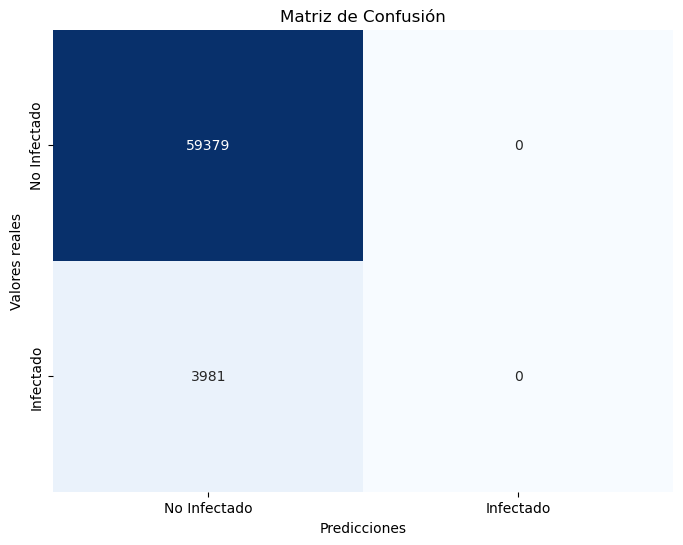

In [46]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Infectado', 'Infectado'],
            yticklabels=['No Infectado', 'Infectado'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()